In [148]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [149]:
wine_df = pd.read_csv('combined_wine.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [150]:
wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [151]:
wine_df.shape

(6497, 13)

In [152]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [153]:
def standardize(value):
    return value.lower()
wine_df['wine_type']=wine_df['wine_type'].apply(standardize)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [154]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

def impute_outlier(wine_df, column):
    impute_column = wine_df[column]
    q1 = wine_df[column].quantile(0.25)
    q3 = wine_df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outlier_median = impute_column[(wine_df[column] >= lower_bound) & (wine_df[column] <= upper_bound)].median()

    def impute_value(value):
        if value<lower_bound or value>upper_bound:
            return non_outlier_median
        else:
            return value

    wine_df[column] = wine_df[column].apply(impute_value)

for column in columns:
    impute_outlier(wine_df, column)

wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.28,0.31,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.28,0.31,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.28,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,6.9,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.28,0.31,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [155]:
wine_df['wine_type']=pd.Categorical(wine_df['wine_type']).codes
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.000000,0.126237,0.163745,-0.039312,0.288521,-0.172509,-0.160008,0.338491,-0.205643,0.119726,-0.137300,-0.109308,-0.307304
volatile acidity,0.126237,1.000000,-0.209987,-0.144728,0.401899,-0.295745,-0.314551,0.222517,0.160202,0.207186,-0.010893,-0.191635,-0.524493
citric acid,0.163745,-0.209987,1.000000,0.068888,-0.077724,0.098649,0.103480,0.069108,-0.206324,0.046205,0.032660,0.091240,0.098863
residual sugar,-0.039312,-0.144728,0.068888,1.000000,-0.143274,0.427907,0.487800,0.466931,-0.252398,-0.155572,-0.332253,-0.013284,0.344381
chlorides,0.288521,0.401899,-0.077724,-0.143274,1.000000,-0.294558,-0.381684,0.539946,0.222996,0.347083,-0.315347,-0.240905,-0.713682
free sulfur dioxide,-0.172509,-0.295745,0.098649,0.427907,-0.294558,1.000000,0.720613,0.029537,-0.155004,-0.179941,-0.183964,0.076624,0.491837
total sulfur dioxide,-0.160008,-0.314551,0.103480,0.487800,-0.381684,0.720613,1.000000,0.029113,-0.242196,-0.248049,-0.270257,-0.034432,0.706939
density,0.338491,0.222517,0.069108,0.466931,0.539946,0.029537,0.029113,1.000000,0.015428,0.255574,-0.702182,-0.313295,-0.401345
pH,-0.205643,0.160202,-0.206324,-0.252398,0.222996,-0.155004,-0.242196,0.015428,1.000000,0.244090,0.107107,0.021144,-0.327039
sulphates,0.119726,0.207186,0.046205,-0.155572,0.347083,-0.179941,-0.248049,0.255574,0.244090,1.000000,-0.002457,0.040847,-0.444925


In [156]:
wine_df=wine_df.drop(['volatile acidity','sulphates','citric acid','wine_type'],axis=1) #dropping columns since correlation with alcohol is very less
wine_df.columns

Index(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality'],
      dtype='object')

In [157]:
feature_columns = ['fixed acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'quality'] 

X = wine_df[feature_columns]
Y = wine_df[['alcohol']]

In [158]:
print('Shape of X', X.shape)
print('Shape of Y', Y.shape)

Shape of X (6497, 8)
Shape of Y (6497, 1)


In [159]:
data_shuffled = pd.concat([X, Y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(0.8 * len(data_shuffled))
data_shuffled['quality'] = data_shuffled['quality'].astype(float)
train_data = data_shuffled[:split_index]
test_data = data_shuffled[split_index:]
print(test_data.shape)
print(train_data.shape)

(1300, 9)
(5197, 9)


In [160]:
def normalize(df,column):
    column_min = df[column].min()
    column_max = df[column].max()
    # print("Minimum value for ",column," is: ",column_min)
    # print("Maximum value for ",column," is: ",column_max)
    df.loc[:, column] = (df[column] - column_min) / (column_max - column_min)


In [161]:
class customLinearRegression :
    
    def __init__(self):
        self.coef = None
        self.intercept = None
    
    def fit(self,X_train,Y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(Y_train)
        self.intercept=betas[0]
        self.coef=betas[1:]
    
    def predict(self,X_test):
        Y_pred = np.dot(X_test, self.coef) + self.intercept
        return Y_pred   

In [162]:
def customMES(y_test,y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    return np.mean((y_test - y_pred) ** 2)

In [163]:
columns=['total sulfur dioxide','free sulfur dioxide','fixed acidity','pH','residual sugar','quality']
for column in columns:
    normalize(train_data,column)
X_train_LR = train_data.iloc[:,:-1]
Y_train_LR = train_data.iloc[:,-1]
print('Shape of X_train is:',X_train_LR.shape)
print('Shape of Y_train is:',Y_train_LR.shape)

for column in columns:
    normalize(test_data,column)

X_test_LR = test_data.iloc[:,:-1]
Y_test_LR = test_data.iloc[:,-1]

print('Shape of X_test is:',X_test_LR.shape)
print('Shape of Y_test is:',Y_test_LR.shape)

Shape of X_train is: (5197, 8)
Shape of Y_train is: (5197,)
Shape of X_test is: (1300, 8)
Shape of Y_test is: (1300,)


In [164]:
lr = customLinearRegression()

lr.fit(X_train_LR,Y_train_LR)

Y_pred_LR=lr.predict(X_test_LR)

mse = customMES(Y_test_LR, Y_pred_LR)
print("MSE for linear regression is:",mse)


MSE for linear regression is: 0.532228810726171


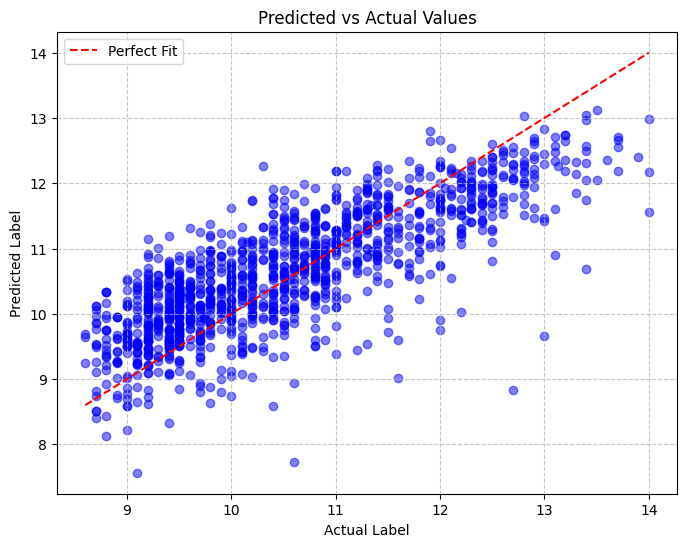

In [165]:
#Linear Regression predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_LR, Y_pred_LR, color='blue', alpha=0.5)
plt.plot([min(Y_test_LR), max(Y_test_LR)], [min(Y_test_LR), max(Y_test_LR)], color='red', linestyle='--', label='Perfect Fit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.legend()

# Show the plot
plt.show()

In [166]:
X_train_RR = train_data.iloc[:,:-1]
Y_train_RR = train_data.iloc[:,-1]
X_test_RR = test_data.iloc[:,:-1]
Y_test_RR = test_data.iloc[:,-1]


In [167]:
class customRidgeRegression :
    
    def __init__(self,alpha):
        self.alpha=alpha
        self.coef = None
        self.intercept = None
    
    def fit(self,X_train,Y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0]=0
        betas = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(Y_train)
        self.intercept=betas[0]
        self.coef=betas[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept 

In [168]:
rr = customRidgeRegression(alpha=0.1)

rr.fit(X_train_RR,Y_train_RR)

Y_pred_RR=rr.predict(X_test_RR)

mse = customMES(Y_test_RR, Y_pred_RR)
print("MSE of ridge regression is:",mse)

MSE of ridge regression is: 0.7871833837101461


In [169]:
print('coeffecients of linear regression are:',lr.coef)
print('intercept of linear regression is:',lr.intercept)
print('coeffecients of ridge regression are:',rr.coef)
print('intercept of ridge regression is:',rr.intercept)

coeffecients of linear regression are: [ 8.70236860e-01  9.62020225e-01  8.35240189e-01 -1.94813064e-01
 -1.43858017e+00 -3.14247391e+02  7.60567477e-01  1.69994292e+00]
intercept of linear regression is: 321.83111621375974
coeffecients of ridge regression are: [ -0.16483782  -0.81116899 -19.47672882  -0.2294529   -1.33820412
 -43.4647961    0.34754918   2.67443763]
intercept of ridge regression is: 54.21200390065812


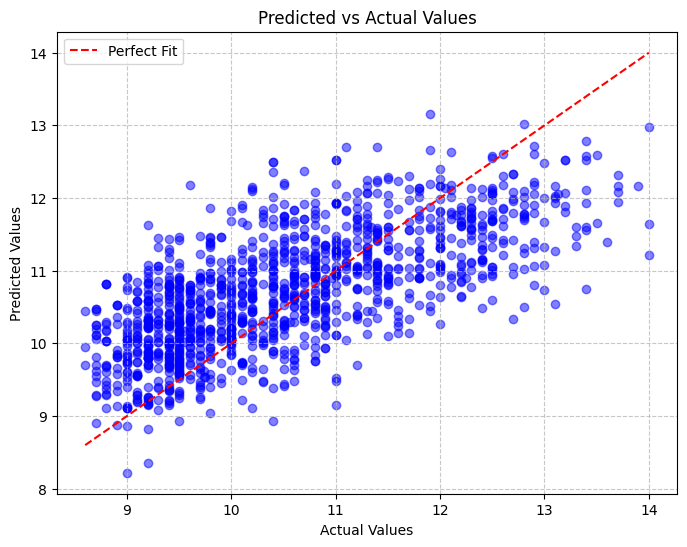

In [170]:
##Ridge Regression predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_RR, Y_pred_RR, color='blue', alpha=0.5)
plt.plot([min(Y_test_RR), max(Y_test_RR)], [min(Y_test_RR), max(Y_test_RR)], color='red', linestyle='--', label='Perfect Fit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [176]:
pickle.dump(rr.coef, open("ganeshdi_sushreen_assignment1_part3.pkl", "wb"))
bestweights = pickle.load(open("ganeshdi_sushreen_assignment1_part3.pkl", "rb"))
print(np.shape(bestweights))
print(bestweights)

FileNotFoundError: [Errno 2] No such file or directory: 'ganeshdi_sushreen_assignment1_part3'